In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,y=make_blobs(n_samples=1000, n_features=2, centers=3, random_state=23)

In [3]:
X

array([[-5.37039106,  3.47555168],
       [ 5.84161203, -3.98182959],
       [ 1.76127766,  9.39696306],
       ...,
       [ 6.14147823, -5.75491603],
       [-5.45330839,  1.75599573],
       [-0.21966953,  8.72922042]])

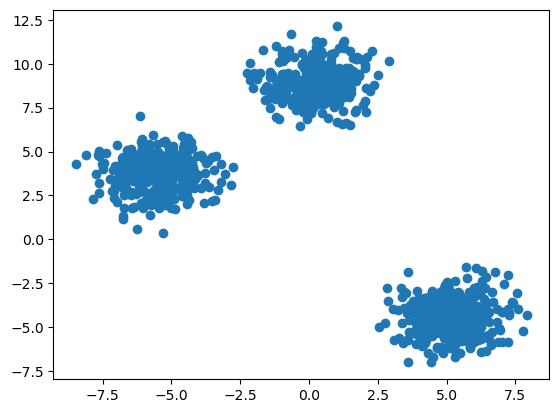

In [4]:
plt.scatter(X[:, 0], X[:, 1])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler=StandardScaler()

In [9]:
X_train_scaled=scaler.fit_transform(X_train)

In [10]:
X_train_scaled

array([[ 1.14761299, -1.22071686],
       [-1.0174601 , -0.04634087],
       [-0.09211   ,  1.13994717],
       ...,
       [-0.09803777,  0.9241862 ],
       [ 1.18538154, -1.17861131],
       [ 1.27396893, -1.38053768]])

In [11]:
from sklearn.cluster import KMeans

In [12]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [13]:
wcss

[1600.0000000000014,
 397.3353248810668,
 63.99820840743208,
 55.285417897108175,
 47.4235671718278,
 39.680077748913284,
 35.57220183900465,
 31.96317872858144,
 28.30856682250679,
 25.852181399276795]

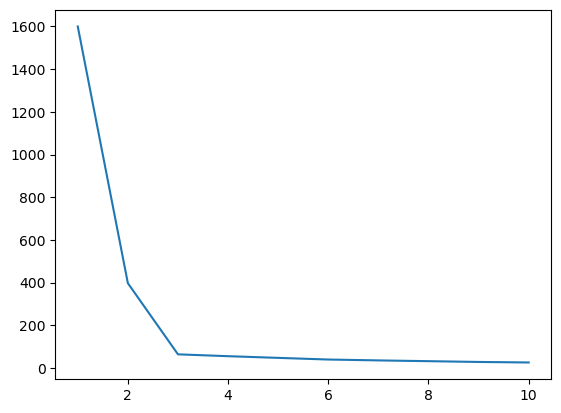

In [14]:
plt.plot(range(1,11), wcss)

In [15]:
kmeans=KMeans(n_clusters=3, init='k-means++')

In [16]:
y_labels=kmeans.fit_predict(X_train_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


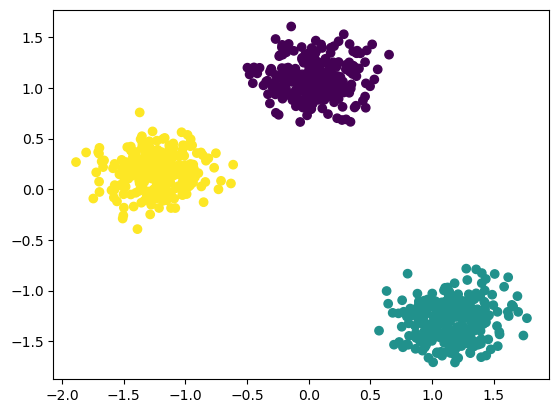

In [17]:
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_labels)

In [18]:
y_test_labels=kmeans.predict(X_test)

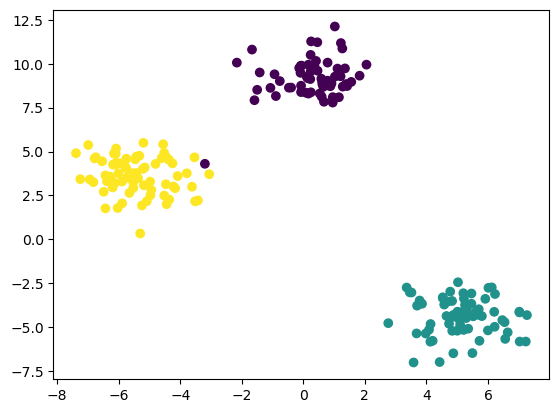

In [19]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_labels)

In [20]:
# Automation
!pip install kneed

In [21]:
from kneed import KneeLocator

In [22]:
kl=KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")

In [23]:
kl.elbow

3

In [24]:
# performance metrics
from sklearn.metrics import silhouette_score

In [27]:
silhouette_coefficient=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficient.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [28]:
silhouette_coefficient

[0.7159916613208815,
 0.8057152201658946,
 0.633522973321393,
 0.4812106943159866,
 0.3340889476894202,
 0.3330500627706223,
 0.3344483880659693,
 0.3410541066773585]

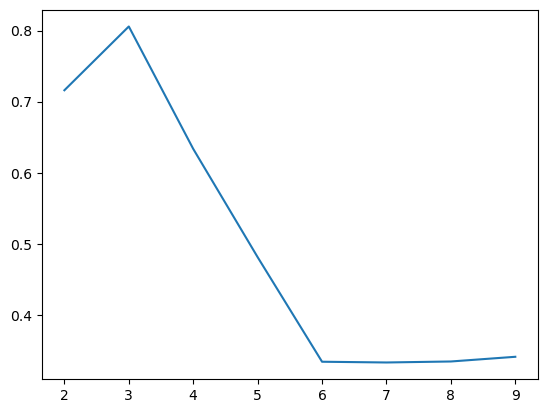

In [29]:
plt.plot(range(2,10), silhouette_coefficient)